# Ajuste de modelo lineal para un conjunto de datos.
### Dada una serie de datos, se ajustará a un modelo lineal usando el método de mínimos cuadrados y comprobando con algunas opciones de funciones de las librerías numpy y scipy. (También mediante el likelihood).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
data=np.load('fit_exercise.npy')
x=data[0]
y=data[1]
yerror=data[2]
data

array([[ 0.59677897,  0.9210494 ,  1.15618395,  1.75451756,  1.8249173 ,
         2.26851454,  2.28263231,  2.50455365,  2.86139335,  2.93714046,
         3.12261223,  3.17285482,  3.22958914,  3.43178016,  3.61788656,
         3.92117518,  3.98044255,  4.14826212,  4.2310646 ,  4.2583029 ,
         4.26351307,  4.30862763,  4.33701173,  4.38572245,  4.80931901,
         4.83034264,  4.93685098,  5.01836676,  5.19485119,  5.31551374,
         5.31827587,  5.51314769,  6.11023511,  6.12894526,  6.23952952,
         6.30976124,  6.34400959,  6.84829739,  6.96469186,  7.1946897 ,
         7.22443383,  7.24455325,  7.29049707,  7.37995406,  8.49431794,
         8.66309158,  8.93389163,  9.44160018,  9.80764198,  9.85559786],
       [ 8.11257148,  3.52815075,  4.81023356,  0.89238164,  3.13295195,
         3.53338034,  1.89933975,  2.83896349,  0.89713921,  0.9500022 ,
         1.45700044,  1.05318568,  1.71011605,  0.06780647,  0.40019114,
         1.00444563, -0.02239716,  0.35714018,  0.

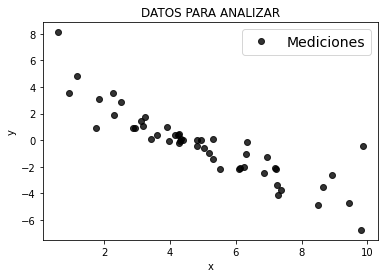

In [3]:
plt.plot(x,y,'ko', alpha=0.8, lw=2, label="Mediciones")
plt.legend(fontsize=14)
plt.xlabel("x")
plt.ylabel("y")
plt.title("DATOS PARA ANALIZAR")
plt.show()

1. Liner least square

In [4]:
#Liner least square
xm=np.average(x)
print(xm)
ym=np.average(y)
print(ym)
n=np.size(x)
sumxy=0
for i in range(n):
    sumxy=x[i]*y[i]+sumxy
sumxy
print(sumxy)
sumx2=0
for j in range(n):
    sumx2=x[j]**2+sumx2
print(sumx2)

5.018578670875471
-0.3511997262920946
-353.5286652621035
1529.5292224588584


In [5]:
b=(sumxy-n*xm*ym)/(sumx2-n*xm**2)
b

-0.9821623517930412

In [6]:
a=(ym*sumx2-xm*sumxy)/(sumx2-n*xm**2)
a

4.577859303753354

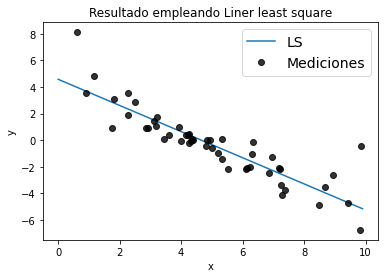

In [7]:
def f(x1):
    return b*(x1)+a

x1 = np.arange(0.0, 10.0, 0.1)

#plt.figure()
x2=data[0]
y2=data[1]
plt.plot(x1,f(x1),label="LS")
plt.plot(x,y,'ko', alpha=0.8, lw=2, label="Mediciones")
plt.legend(fontsize=14)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Resultado empleando Liner least square")
plt.show()

2. Minimum Chisq.

In [8]:
def func(x3, d, c):
    return d*x3+c
popt, pcov = curve_fit(func, x2, y2, sigma=yerror**.5) #Minimum Chisq.
popt


array([-1.03191018,  4.97297342])

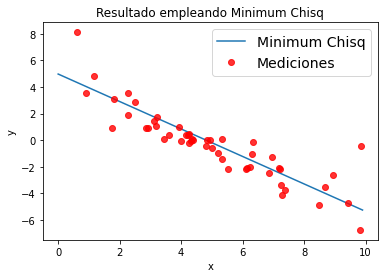

In [9]:
plt.plot(x1,func(x1,popt[0],popt[1]),label="Minimum Chisq")
plt.plot(x,y,'ro', alpha=0.8, lw=2, label="Mediciones")
plt.legend(fontsize=14)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Resultado empleando Minimum Chisq")
plt.show()

3. Sampling from the maximum likelihood.
Usando un likelihood gaussiano y un modelo para una linea recta (polinomio de primer orden). 


$$L=\prod_{i=1}^{n} \frac{1}{\sigma_i\sqrt{2\pi}}exp({-\frac{(y_i- \lambda (x_i , \theta ))^2}{2\sigma_i^2}})$$
$$L=\prod_{i=1}^{n} \frac{1}{\sigma_i\sqrt{2\pi}}exp({-\frac{(y_i-\alpha-\beta x_i)^2}{2\sigma_i^2}})$$

$$ ln ({L}(x_i,y_i|\vec{\theta}))= \sum_{i}ln(\frac{1}{\sigma_i\sqrt{2\pi}}) -\frac{(y_i-\alpha-\beta x_i)^2 }{2\sigma_i^2}$$


Para maximizar la función obtenemos 

$$\frac{\partial}{\partial\alpha}ln(L)=\sum_{i}\frac{y_i-\alpha -\beta x_1}{\sigma_i^2}=0$$

$$\frac{\partial}{\partial\beta}ln(L)=\sum_{i}\frac{(y_i-\alpha -\beta x_1)x_i}{\sigma_i^2}=0$$

o bien

$$\sum_{i}\frac{y_i}{\sigma_i^2}=\alpha\sum_{i}\frac{1}{\sigma_i^2}+\beta\sum_{i}\frac{x_i}{\sigma_i^2}$$

$$\sum_{i}\frac{y_ix_i}{\sigma_i^2}=\alpha\sum_{i}\frac{x_i}{\sigma_i^2}+\beta\sum_{i}\frac{x_i^2}{\sigma_i^2}$$

El sistema a resolver es de la forma
$$\begin{pmatrix}
\sum_{i}\frac{y_i}{\sigma_i^2}\\
\sum_{i}\frac{y_ix_i}{\sigma_i^2}\\
\end{pmatrix}
\begin{pmatrix}
\sum_{i}\frac{1}{\sigma_i^2} & \sum_{i}\frac{x_i}{\sigma_i^2} \\
\sum_{i}\frac{x_i}{\sigma_i^2} & \sum_{i}\frac{x_i^2}{\sigma_i^2} \\
\end{pmatrix}=
\begin{pmatrix}
\alpha\\
\beta\\
\end{pmatrix}
$$

In [10]:
X=data[0,]
Y=data[1,]
Sigma=data[2,]
Sigma_sqrt=Sigma
Sigma_sq=Sigma**2

S=[np.sum(Y/Sigma_sq),np.sum((Y*X)/Sigma_sq)]
M=[(np.sum(1/Sigma_sq),np.sum(X/Sigma_sq)),(np.sum(X/Sigma_sq),np.sum((X**2)/Sigma_sq))]
M_inv = np.linalg.inv(M)
solucion=M_inv @ S
y=np.zeros(len(X))

In [11]:
#Función del modelo
for i in range (len(X)):
    y[i]=solucion[0]+solucion[1]*X[i]
    

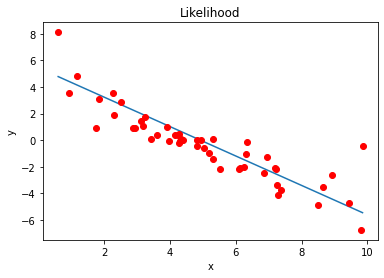

In [12]:
plt.plot(X,y)
plt.plot(data[0],data[1], 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Likelihood')
plt.show()